## Numerical Differentiation

In [25]:
%matplotlib inline

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database',)).History will not be written to the database.


In [26]:
import numpy as np
import matplotlib.pyplot as pl

Applications:

1. Derivative difficult to compute analytically
2. Rate of change in a dataset
 - You have position data but you want to know velocity
3. Finding extrema
 - Important for fitting models to data (**ASTR 3800**)
 - Maximum likelihood methods
 - Topology: finding peaks and valleys (place where slope is zero)

### Topology Example: South Pole Aitken Basin (lunar farside)

Interesting:
    
1. Oldest impact basin in the solar system
  - Important for studies of solar system formation
2. Permananently shadowed craters
  - High concentration of hydrogen (e.g., LCROSS mission)!
  - Good place for an observatory (e.g., the Lunar Radio Array concept)!

In [27]:
from IPython.display import Image

In [28]:
Image(url='http://wordlesstech.com/wp-content/uploads/2011/11/New-Map-of-the-Moon-2.jpg')

### Question
> Image you're planning a mission to the South Pole Aitken Basin and want to explore some permanently shadowed craters. What factors might you consider in planning out your rover's landing site and route?

#### Most rovers can tolerate grades up to about 20%, For reference, the grade on I-70 near Eisenhower Tunnel is about 6%.

## Differentiation Review

### Numerical Derivatives on a Grid (Text Appendix B.2)

In [29]:
def forwardDifference(f, x, h):
    """
    A first order differentiation technique.
    
    Parameters
    ----------
    f : function to be differentiated
    x : point of interest
    h : step-size to use in approximation
    """
    return (f(x + h) - f(x)) / h   # From our notes

In [30]:
def centralDifference(f, x, h):
    """
    A second order differentiation technique.
    
    Also known as `symmetric difference quotient.
    
    Parameters
    ----------
    f : function to be differentiated
    x : point of interest
    h : step-size to use in approximation

    """
    return (f(x + h) - f(x - h)) / (2.0 * h)  # From our notes

In [31]:
np.linspace(1,10,100).shape

(100,)

In [33]:
def derivative(formula, func, xLower, xUpper, n):  
    """
    Differentiate func(x) at all points from xLower
    to xUpper with n *equally spaced* points.
    
    The differentiation formula is given by 
    formula(func, x, h).
    """
    h = (xUpper - xLower) / float(n)                 # Calculate the derivative step size
    xArray = np.linspace(xLower, xUpper, n)          # Create an array of x values
    derivArray = np.zeros(n)               # Create an empty array for the derivative values
    
    for index in range(1, n - 1):                   # xrange(start, stop, [step])
        derivArray[index] = formula(func, xArray[index], h)    # Calculate the derivative for the current
                                                               # x value using the formula passed in

    return (xArray[1:-1], derivArray[1:-1])    # This returns TWO things:
                                               # x values and the derivative values

#### Notice that we don't calculate the derivative at the end points because there are no points beyond them to difference with.

#### Q. So, what would happen without the [1:-1] in the return statement?

In [32]:
def derivative2(formula, func, xLower, xUpper, n):  
    """
    Differentiate func(x) at all points from xLower
    to xUpper with n+1 *equally spaced* points.
    The differentiation formula is given by 
    formula(func, x, h).
    """
    h = (xUpper - xLower) / float(n)                 # Calculate the derivative step size
    xArray = np.linspace(xLower, xUpper, n)          # Create an array of x values
    derivArray = np.zeros(n)               # Create an empty array for the derivative values
    
    for index in range(0, n):                       # xrange(start, stop, [step])
        derivArray[index] = formula(func, xArray[index], h)    # Calculate the derivative for the current
                                                               # x value using the formula passed in

    return (xArray, derivArray)    # This returns TWO things:
                                               # x values and the derivative values

### Example: Differentiate $\sin(x)$

We know the answer:

$$\frac{d}{dx} \left[\sin(x)\right] = \cos(x)$$

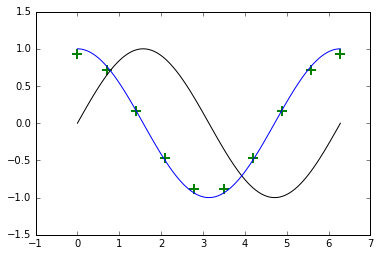

In [39]:
tau = 2*np.pi

x = np.linspace(0, tau, 100)

# Plot sin and cos
pl.plot(x, np.sin(x), color='k');
pl.plot(x, np.cos(x), color='b');

# Compute derivative using central difference formula
xder, yder = derivative2(centralDifference, np.sin, 0, tau, 10) 

# Plot numerical derivative as scatter plot
pl.scatter(xder, yder, color='g', s=100, marker='+', lw=2);
# s controls marker size (experiment with it)
# lw = "linewidth" in pixels

#### Notice that the points miss the curve.

#### Q. How can we improve the accuracy of our numerical derivative?

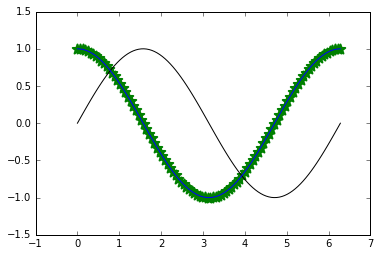

In [41]:
# Plot sin and cos
pl.plot(x, np.sin(x), color='k')
pl.plot(x, np.cos(x), color='b')

# Compute derivative using central difference formula
xder, yder = derivative2(centralDifference, np.sin, 0, tau, 100) 

# Plot numerical derivative as scatter plot
pl.scatter(xder, yder, color='g', s=100, marker='*', lw=2)  

### Example: Traversing A 1-D landscape

Gaussian Equation: 

$$f(x)=A * e^{-\frac{(x-\mu)^2}{2*\sigma}}$$

In [42]:
numCraters = 5       # number of craters
widthMax   = 1.0     # maximal width of Gaussian crater
heightMin  = -1.0    # maximal depth of craters / valleys
heightMax  = 2.0     # maximal height of hills / mountains

# 1-D Gaussian
def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / 2.0 / sigma**2)

# 1-D Gaussian (same thing using lambda)
#gaussian = lambda x, A, mu, sigma: A * np.exp(-(x - mu)**2 / 2. / sigma**2) 

# Create an array of linearly spaced x values
xArray = np.linspace(0, 10, 500)  # km

# Create an array of initially flat landscape (aka filled with 0's)
yArray = np.zeros_like(xArray)

# Add craters / mountains to landscape
for _ in range(numCraters):    # '_' is the so called dummy variable
    
    # Amplitude between heightMin and heightMax
    A = np.random.rand() * (heightMax - heightMin) + heightMin
    
    # Center location of the crater
    center = np.random.rand() * xArray.max()
    
    # Width of the crater
    sigma = np.random.rand() * widthMax
    
    # Add crater to landscape!
    yArray += gaussian(xArray, A=A, mu=center, sigma=sigma)

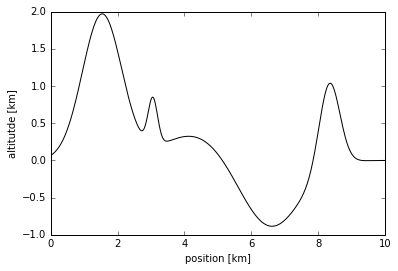

In [43]:
pl.plot(xArray, yArray, color='k')
pl.xlabel('position [km]')
pl.ylabel('altitutde [km]')

#### Q. Where should our spacecraft land? What areas seem accessible?

#### Q. How do we find the lowest point? Highest? How could we determine how many "mountains" and "craters" there are?

In [44]:
dydx = np.diff(yArray) / np.diff(xArray)

#### Q. What do you think "diff" does?

In [46]:
arr = np.array([1,4,10, 12,5, 7])

In [47]:
np.diff(arr)

array([ 3,  6,  2, -7,  2])

#### Q. What type of differentiation scheme does this formula represent? How is this different than our "derivative" function from earlier?

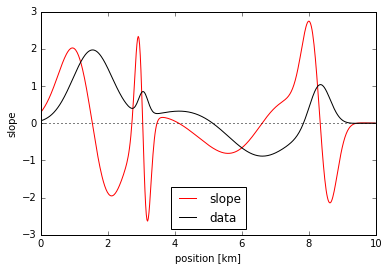

In [48]:
pl.plot(xArray[0:-1], dydx, color='r', label='slope')
pl.plot(xArray, yArray, color='k', label='data')

pl.xlabel('position [km]')
pl.ylabel('slope')
pl.plot([xArray.min(), xArray.max()], [0,0], color='k', ls=':')
#pl.ylim(-4, 4)
pl.legend(loc='best')

#### Q. How many hills and craters are there?

#### Q. Why did we use x[0:-1] in the above plot instead of x?

In [49]:
slopeTolerance = 0.5

#### Q. Using the slope, how could we determine which places we could reach and which we couldn't?

In [50]:
myArray = np.array([0, 1, 2, 3, 4])                  # Create an array

tfArray = np.logical_and(myArray < 2, myArray != 0)  # Use boolean logic on array

print (myArray)               # Print original array
print (tfArray)               # Print the True/False array (from boolean logic)
print (myArray[tfArray])      # Print the original array using True/False array to limit values

[0 1 2 3 4]
[False  True False False False]
[1]


In [53]:
reachable = np.logical_and(dydx < slopeTolerance, dydx > -slopeTolerance)
unreachable = np.logical_not(reachable)

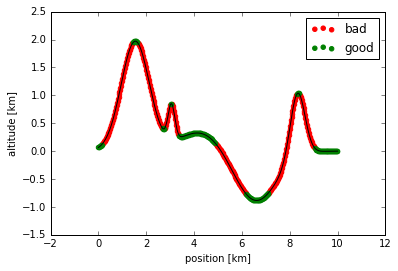

In [54]:
pl.plot(xArray, yArray, color='k')
pl.scatter(xArray[:-1][unreachable], yArray[:-1][unreachable], color='r', label='bad')
pl.scatter(xArray[:-1][reachable], yArray[:-1][reachable], color='g', label='good')

pl.legend(loc='best')
pl.xlabel('position [km]')
pl.ylabel('altitude [km]')

### Summary